In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid
import datetime
import shelve
from collections import Counter

In [13]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [3]:
area = 'area3'
image_dir='../%s/2014/images/' % area
mask_dir='../%s/2014/masks/' % area
table_dir='../%s/2014/tables/LC8_SR.csv' % area
new_table_dir='../%s/2015/tables/LC8_SR.csv' % area
shelve_root_dir='../models/%s/shelves/' % area
processes=8
max_days_apart=30
step=250000

In [4]:
imgs = shelve.open(shelve_root_dir + 'old/interpolated')

In [5]:
arr, cls = rlu.read_land_use(da_shapefile="../SDM324649_full/ll_gda94/sde_shape/whole/VIC/CATCHMENTS/layer/landuse_2014.shp",
                       resolution=(2387, 1976),
                       area_filter="POLYGON ((144.0229424345357 -37.55299953752239, 144.02019905996406 -37.97282887730929, 144.6632499098556 -37.972670022747636, 144.66240633494579 -37.552454710108975, 144.0229424345357 -37.55299953752239))",
                       buffer=0,
                       processes=8)

In [6]:
arr.shape

(1976, 2387)

In [7]:
items = list(imgs.items())
items.sort()
ts, res = items[0]
img = rid.open_img(ts, shelve_root_dir + 'old/maps_interpolated/', res)

In [8]:
img.shape

(3, 1976, 2387)

In [9]:
img.shape[1] * img.shape[2]

4716712

In [15]:
dfs = [(rg, df) for rg, df in rid.partial_set_iterator(step, imgs, shelve_root_dir + 'old/maps_interpolated/', arr)]

In [16]:
len(dfs)

19

In [19]:
head = rid.generate_coordinate_columns(1976, 2387)

In [20]:
tars = [pd.DataFrame(np.concatenate([head[rg[0]:rg[1], :], df['label'].reshape(len(df['label']), 1)], axis=1)) 
        for rg, df in dfs]

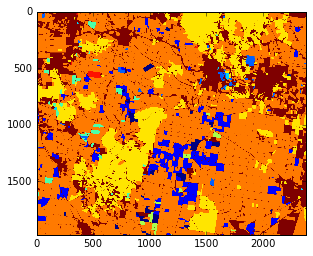

In [22]:
tar = pd.concat(tars, axis=0)
cls_map = tar.pivot(index=0, columns=1, values=2)
plt.imshow(cls_map)